# Desc

<b>The dataset is very unbalanced. </b> For example, C3S4 and C3S4 classes have only one sample. This situation is not good in respect of  using the oversampling methods. <br>

I tried to create a new class (called the other) by combining other classes which have a small sample size.
Finally, there are six classes to classify, named 'C2S1', 'C3S1', 'C3S2', 'C4S1', 'C4S2', 'Other'.


## Results

I have used optima for optimizing the model. The results were not very good. Although our model gained reasonable precision/recall scores in a few classes, some classes have bad scores.<br>

- (Test Set) R2 score : 82.851
- (Test Set) MAE : 0.207831

| class        	| precision 	| recall 	| f1-score 	| support 	|
|--------------	|-----------	|--------	|----------	|---------	|
| 0            	| 1.00      	| 0.97   	| 0.99     	| 76      	|
| 1            	| 0.97      	| 0.99   	| 0.98     	| 204     	|
| 2            	| 0.25      	| 0.17   	| 0.20     	| 6       	|
| 3            	| 0.88      	| 0.88   	| 0.88     	| 26      	|
| 4            	| 0.73      	| 0.67   	| 0.70     	| 12      	|
| 5            	| 0.62      	| 0.62   	| 0.62     	| 8       	|
| accuracy     	|           	|        	| 0.94     	| 332     	|
| macro avg    	| 0.74      	| 0.72   	| 0.73     	| 332     	|
| weighted avg 	| 0.94      	| 0.94   	| 0.94     	| 332     	|

# Install

In [119]:
# !pip install catboost
# !pip install scikit-learn
# !pip install seaborn
# !pip install numpy
# !pip install pandas
# !pip install mealpy
# !pip install pyswarms
# !pip install imbalanced-learn
# !pip install jupyterlab
# !pip install jupyter_http_over_ws
# !pip install xgboost
# # !pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/release_2.0.0/xgboost-2.0.1%2Ba408254c2f0c4a39a04430f9894579038414cb31-py3-none-manylinux2014_x86_64.whl
# # !pip install --upgrade --no-cache-dir gdown
# # !jupyter serverextension enable --py jupyter_http_over_ws

# Code

In [120]:
# Importing dependencies

import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier, Pool

# <span style="color:#e74c3c;"> Reading </span> Data


In [121]:
# !gdown 1SaxJ8KPMrV37ZsVTv5F5ava5aXtGRiSn
# !gdown 1E6BZ-AEncUOWlsK96SFz5wBK8w7XjmVB
# !gdown 195J88Onvr23J8HdFtO3D_Yezi97clcZ9
# !gdown 1C4ERjxVqEnxTGxwQVz98u3gaxA_hnzrH
# !gdown 10KFETqq39CXdFP2zTqPgRKOGqFuVlhL9
# !gdown 1I5c33LgqPIjtSFAThzIYFYllWgrzNTT0
# !gdown 1S6YYB6ew3CdlIT8YtMCLw-g0WJlmV6D1
# !gdown 1Xnhm2FD-mDuX6AQ-Nqs-OHd5s5zWyn3e
# !gdown 1oykno6YaFS6Fx9G8sI4RlqVnu36x693F
# !gdown 1wDqaIzte9f5KLfEOTa0r9a6QrKZ34_Yx

In [122]:
# Reading data

data1 = pd.read_csv('./ground_water_quality_2018_post.csv')
data2 = pd.read_csv('./ground_water_quality_2019_post.csv')
data3 = pd.read_csv('./ground_water_quality_2020_post.csv')
data4 = pd.read_csv('./ground_water_quality_2020_post.csv')
data5 = pd.read_csv('./ground_water_quality_2020_post.csv')
data6 = pd.read_csv('./ground_water_quality_2018_pre.csv')
data7 = pd.read_csv('./ground_water_quality_2019_pre.csv')
data8 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data9 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data10 = pd.read_csv('./ground_water_quality_2020_pre.csv')

In [123]:

data2.rename( columns ={ 'EC' : 'E.C', 'CO_-2 ' : 'CO3', 'HCO_ - ' :'HCO3', 'Cl -' : 'Cl',
                        'F -' : 'F', 'NO3- ': 'NO3 ' , 'SO4-2':'SO4' , 'Na+':'Na', 'K+':'K',
                        'Ca+2' : 'Ca', 'Mg+2':'Mg'}, inplace = True)

# Create a list of column names to drop
columns_to_drop = ['sno', 'season', 'Unnamed: 8']
list_data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

# Loop through your dataframes and drop the columns if they exist
for df in list_data:
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

# creating new columns
data1['year'] = 2018
data2['year'] = 2019
data3['year'] = 2020
data4['year'] = 2021
data5['year'] = 2022
data6['year'] = 2018
data7['year'] = 2019
data8['year'] = 2020
data9['year'] = 2021
data10['year'] = 2022



# handling and fixing outliers
data3['pH'].iloc[261] = data3['pH'].iloc[261].replace('8..05', '8.05')
data3['pH'] = data3['pH'].apply(pd.to_numeric)

for df in list_data:
    df['Classification'] = df['Classification'].replace(['O.G'], 'OG')

In [124]:
data_full = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], axis = 0)
data_full.to_csv('ground_water_merge.csv', index=False)

In [125]:
len(data_full)

3645

In [126]:
# creating and applying the new_class function

def new_class(X):
    # if (X == 'C3S4') | (X == 'C2S2') | (X == 'C4S4') | (X == 'C3S3') | (X == 'C4S3') | (X == 'OG')  | (X == 'C1S1')  :
    if (X == 'C1S1'):
        return 'Sangat Baik'
    elif (X == 'C1S2') | (X == 'C2S1') | (X == 'C2S2'):
        return 'Baik'
    elif (X == 'C1S3') | (X == 'C3S1'):
        return 'Boleh Digunakan'
    elif (X == 'C2S3') | (X == 'C3S2') | (X == 'C3S3'):
        return 'Marginal'
    elif (X == 'C1S4') | (X == 'C2S4') | (X == 'C3S4') | (X == 'C4S1') | (X == 'C4S2'):
        return 'Buruk'
    elif  (X == 'C4S3') | (X == 'C4S4') :
        return 'Sangat Buruk'
    elif ( X == 'OG') | (X == "BELOW THE GRAPH") :
        return 'Other'
    else:
        return X

data_full['Classification'] = data_full['Classification'].apply(new_class)

In [127]:
def rsc_class(x):
    if x < 1.25:
        return 2
    elif 1.25 <= x <= 2.5:
        return 1
    else:
        return 0

data_full['rsc_class'] = data_full['RSC  meq  / L'].apply(rsc_class)

In [128]:
def tds_class(x):
    if x < 1000:
        return 5
    elif 1000 <= x < 3000:
        return 4
    elif 3000 <= x < 5000:
        return 3
    elif 5000 <= x < 7000:
        return 2
    elif 7000 <= x < 10000:
        return 1
    else:
        return 0

data_full['tds_class'] = data_full['TDS'].apply(tds_class)

In [129]:
# cols2drop = ['district','mandal', 'village', 'lat_gis', 'long_gis', 'Classification.1', 'Unnamed: 8']
cols2drop = ['district', 'mandal', 'village', 'Classification.1', 'temp_id', 'E.C', 'TDS', 'T.H']
# cols2drop = ['Classification.1', 'Unnamed: 8']
data_full_copy = data_full
data_full = data_full[data_full['Classification'] != 'Other']
data_full = data_full[data_full['pH'] != "Sample Leaked Out"]
data_full['pH'] = data_full['pH'].replace('8..05', '8.05')
data_full['pH'] = data_full['pH'].apply(pd.to_numeric)

data_full = data_full.drop(cols2drop, axis=1)

In [130]:
len(data_full)

3630

In [131]:
class_distribution = data_full['Classification'].value_counts()
# check class distribution
print(class_distribution)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64


In [132]:
# total null elements

data_full.isnull().sum()[data_full.isnull().sum() > 0]

gwl                48
CO3               161
HCO3                1
Cl                  1
F                   1
NO3                 1
SO4                 1
Na                  1
K                   1
Ca                  1
Mg                  1
SAR                 1
Classification      1
RSC  meq  / L       1
dtype: int64

In [133]:
# imputing null values

imp_knn = KNNImputer(n_neighbors=3)

data_full['CO3'] = imp_knn.fit_transform(np.array(data_full['CO3']).reshape(-1,1) )
data_full['gwl'] = imp_knn.fit_transform(np.array(data_full['gwl']).reshape(-1,1) )

In [134]:
data_full.isnull().sum()[data_full.isnull().sum() > 0]

HCO3              1
Cl                1
F                 1
NO3               1
SO4               1
Na                1
K                 1
Ca                1
Mg                1
SAR               1
Classification    1
RSC  meq  / L     1
dtype: int64

In [135]:
data_full = data_full.dropna()

In [136]:
data_full.head()

,lat_gis,long_gis,gwl,pH,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,SAR,Classification,RSC meq / L,year,rsc_class,tds_class
0,19.668300,78.524700,5.09,8.28,0.0,220.0,60.0,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,1.273328,Baik,-1.198684,2018,2,5
1,19.458888,78.350833,5.10,8.29,0.0,230.0,80.0,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,0.913166,Boleh Digunakan,-3.397862,2018,2,5
2,19.525555,78.512222,4.98,7.69,0.0,200.0,30.0,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,1.319284,Baik,-0.398684,2018,2,5
3,19.730555,78.640000,5.75,8.09,0.0,160.0,10.0,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,0.928155,Baik,0.000658,2018,2,5
4,19.495665,78.852654,2.15,8.21,0.0,300.0,340.0,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,5.682664,Buruk,-4.396875,2018,2,4


In [137]:
# creating train data and target

X = data_full.copy()
X.drop('Classification', axis= 1, inplace = True)

y = data_full['Classification']

In [138]:
X.dtypes

lat_gis          float64
long_gis         float64
gwl              float64
pH               float64
CO3              float64
HCO3             float64
Cl               float64
F                float64
NO3              float64
SO4              float64
Na               float64
K                float64
Ca               float64
Mg               float64
SAR              float64
RSC  meq  / L    float64
year               int64
rsc_class          int64
tds_class          int64
dtype: object

In [139]:
pd.value_counts(y)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64

In [140]:
LB = LabelEncoder()
y = LB.fit_transform(y)
LB.classes_

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [141]:
original_classes = LB.inverse_transform(y)
np.unique(original_classes)

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [142]:
# categorical features

cat_feat_idx =  np.where(X.dtypes == 'object')[0]
cat_feat_idx

array([], dtype=int64)

In [143]:
# scaling numerical data

MX = MinMaxScaler()
X.iloc[:, 3:21] = MX.fit_transform(X.iloc[:, 3:21])

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33 , shuffle = True, stratify=y, random_state= 42)

print(X_train.shape)
print(X_test.shape)

(2431, 19)
(1198, 19)


In [145]:
# balancing class
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
#SMOTE Training data

In [146]:
y_class = np.unique(y_train)
y_class

array([0, 1, 2, 3, 4, 5])

In [147]:
# creating class weights

unique_classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weights = dict(zip(unique_classes, weights))
class_weights

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}

In [148]:
# creating pools for training and testing

train_pool = Pool(X_train, y_train, cat_features = cat_feat_idx)
test_pool = Pool(X_test, y_test, cat_features = cat_feat_idx)

In [149]:
device_type = 'GPU'

## Base

### <span style="color:#e74c3c;"> CatBoost </span> Classifier


In [150]:
# cb_model = CatBoostClassifier(iterations= 6000, task_type=device_type, devices='0:1', learning_rate = 0.0039, depth=5, l2_leaf_reg=0.3, min_data_in_leaf = 27, class_weights=class_weights)
cb_model = CatBoostClassifier(task_type=device_type, devices='0:1', class_weights=class_weights)

cb_model.fit(train_pool, verbose = 1000 )

Learning rate set to 0.102295
0:	learn: 1.4101238	total: 7.49ms	remaining: 7.49s


999:	learn: 0.0043293	total: 6.93s	remaining: 0us


In [151]:
importances = cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

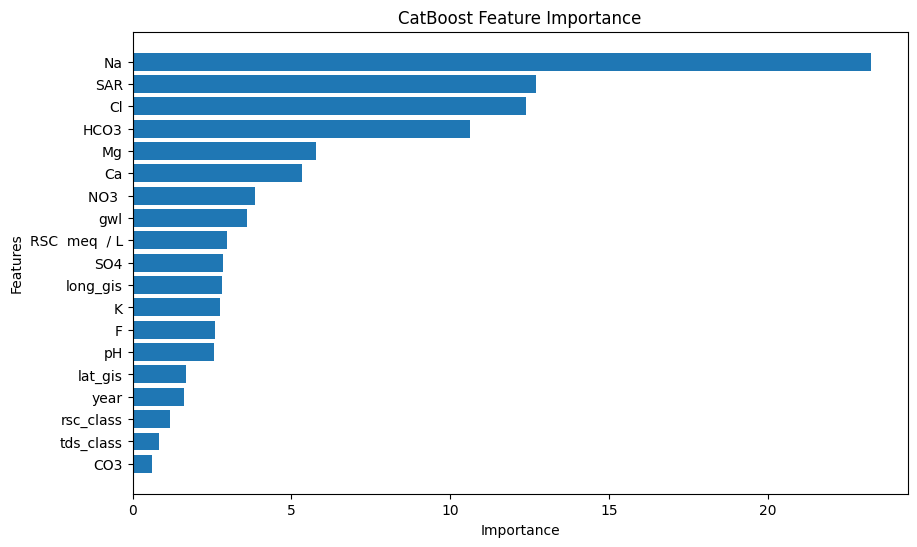

In [152]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Swarm Intelligence

### PSO

In [153]:
import pyswarms as ps
from mealpy import FloatVar, PSO

In [154]:
labels = [0, 1, 2, 3, 4, 5]

In [155]:
# Define the hyperparameter search space
hyperparameter_ranges_cb = {
    'iterations': (100, 5000),  # Reduce the range of boosting iterations
    'depth': (2, 8),           # Reduce the range of tree depth
    'learning_rate': (0.001, 0.1),  # Reduce the learning rate range
    'min_data_in_leaf': (20, 35),
    'l2_leaf_reg': (1, 16),      # Reduce the range of regularization strength
}

In [156]:
def objective_function_cb(x):
    # Round the elements of x to integers
    # x = x.astype(int)
    x = x.reshape(-1)  # Ensure x is a 1D array
    params = {
        'iterations': int(x[0]),
        'depth': int(x[1]),
        'learning_rate': float(x[2]),
        'min_data_in_leaf': int(x[3]),
        'l2_leaf_reg': float(x[4]),
        'loss_function': 'MultiClass',
        'one_hot_max_size': 254,
        'class_weights': class_weights,
        'task_type': device_type,
        'devices': '0:1',
        'cat_features': cat_feat_idx,
        'verbose': 0,
    }

    cbof_model = CatBoostClassifier(**params)
    cbof_model.fit(train_pool)
    y_pred = cbof_model.predict(X_test)
    #Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #Precision
    precision = precision_score(y_test, y_pred, average="macro")
    #Recall
    recall = recall_score(y_test, y_pred, average="macro")
    #f1-score
    f1score = f1_score(y_test, y_pred, average="macro")
    auroc_list = []
    ytest_bin = label_binarize(y_test, classes=labels)
    ypreds_bin = label_binarize(y_pred, classes=labels)
    roc_auc_score = metrics.roc_auc_score(ytest_bin, ypreds_bin, average='macro', multi_class='ovo')
    # print('AUC:', roc_auc_score)
    
    return f1score, accuracy

In [157]:
problem_dict_cb = {
    "bounds": FloatVar(lb=(100, 2, 0.001, 20, 0.1), ub=(5000, 8, 0.1, 35, 1.0), name="delta"),
    "minmax": "max",
    "obj_func": objective_function_cb,
    "obj_weights": [0.7,0.3]
}

#### OF Catboost

In [158]:
model_pso_cb = PSO.OriginalPSO(epoch=20, pop_size=20, c1=2.05, c2=2.05, w=0.7)
g_best_pso_cb = model_pso_cb.solve(problem_dict_cb)

2023-11-09 13:48:00,294 - mealpy.swarm_based.PSO.OriginalPSO - INFO - Solving 2-objective optimization problem with weights: [0.7 0.3].


AUC: 0.9665420685064127
AUC: 0.9623304802777372
AUC: 0.9680317497649501
AUC: 0.9673422134410311
AUC: 0.9724946033311265
AUC: 0.9684281529716398
AUC: 0.9700098227879049
AUC: 0.9718445503686105
AUC: 0.9710204786099649
AUC: 0.966647969324809
AUC: 0.969297527050188
AUC: 0.9758566327508239
AUC: 0.9696388658187778
AUC: 0.9610520819189179
AUC: 0.9666383097737891
AUC: 0.9708988492040613
AUC: 0.9749987754754281
AUC: 0.9675404150443758
AUC: 0.9696601500478755
AUC: 0.9660625827696356
AUC: 0.9663438669030678
AUC: 0.9698404012804379
AUC: 0.9680668184628448
AUC: 0.9720761426231282
AUC: 0.9722321803655335
AUC: 0.9705642496061092
AUC: 0.9710767139356428
AUC: 0.9735636137015472
AUC: 0.9708904783981857
AUC: 0.9729486773274973
AUC: 0.9687388204378166
AUC: 0.9705762156719969
AUC: 0.9742243329107646
AUC: 0.9665301024405251
AUC: 0.9697319400805297
AUC: 0.9720650674307659
AUC: 0.9717901770835892
AUC: 0.9703623543501715
AUC: 0.9557816517832315
AUC: 0.9727466177181148


2023-11-09 13:58:20,973 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 1, Current best: 0.9220284081761427, Global best: 0.9220284081761427, Runtime: 258.95996 seconds


AUC: 0.970762451209454
AUC: 0.9707449168605068
AUC: 0.9687388204378166
AUC: 0.9702343319499637
AUC: 0.9686143885090969
AUC: 0.9675860337319865
AUC: 0.9695132630024802
AUC: 0.9716594988794247
AUC: 0.9712629494731
AUC: 0.96987062201423
AUC: 0.9729592031408578
AUC: 0.9714919769989963
AUC: 0.9688209609183174
AUC: 0.9685581531834191
AUC: 0.9686199567921566
AUC: 0.9710390998969584
AUC: 0.973161642211798
AUC: 0.9705066887727148
AUC: 0.9727770588713608
AUC: 0.967975855827082


2023-11-09 14:03:57,843 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 2, Current best: 0.9220284081761427, Global best: 0.9220284081761427, Runtime: 336.86692 seconds


AUC: 0.9678686168595
AUC: 0.9736019251204486
AUC: 0.9705522835402216
AUC: 0.9714865549155717
AUC: 0.9684097891229242
AUC: 0.9587433832276292
AUC: 0.9708629510063984
AUC: 0.9711026190904658
AUC: 0.9685166867026965
AUC: 0.966659455136973
AUC: 0.9726596722408004
AUC: 0.9720290579944603
AUC: 0.9690288767260916
AUC: 0.9684217551888118
AUC: 0.972395918459743
AUC: 0.9707568829263944
AUC: 0.9703429453707574
AUC: 0.9678686168595
AUC: 0.9717239588113432
AUC: 0.9676933084843703


2023-11-09 14:07:56,870 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 3, Current best: 0.9225192066506649, Global best: 0.9225192066506649, Runtime: 239.02461 seconds


AUC: 0.9711413200671964
AUC: 0.9696988510246061
AUC: 0.9721556081680922
AUC: 0.9712255740040859
AUC: 0.9737597331010331
AUC: 0.9699237439010465
AUC: 0.9697219536566131
AUC: 0.965591147275675
AUC: 0.9684281529716398
AUC: 0.9720170919285726
AUC: 0.9650612027842139
AUC: 0.9698850865620633
AUC: 0.9674402954844648
AUC: 0.970915095064116
AUC: 0.9680492841138975
AUC: 0.9670107808487035
AUC: 0.9716219772107756
AUC: 0.9712255740040859
AUC: 0.9744631714950637
AUC: 0.9683085933843775


2023-11-09 14:12:32,265 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 4, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 275.39425 seconds


AUC: 0.9733547768477792
AUC: 0.9678686168595
AUC: 0.9665420685064127
AUC: 0.9697928404889041
AUC: 0.9690704770796117
AUC: 0.9735805428617351
AUC: 0.9707006476007165
AUC: 0.9709670505956268
AUC: 0.968337630277816
AUC: 0.966660760101941
AUC: 0.9718308563911154
AUC: 0.9714344531844258
AUC: 0.9697058963227653
AUC: 0.9721695472570276
AUC: 0.9669940547349252
AUC: 0.9702430930891444
AUC: 0.9711237857182491
AUC: 0.9689370220411613
AUC: 0.9749861618942092
AUC: 0.9681194585285108


2023-11-09 14:18:25,909 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 5, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 353.64105 seconds


AUC: 0.9718364246741751
AUC: 0.9745331431248085
AUC: 0.9647571826861977
AUC: 0.9727652443128562
AUC: 0.9665301024405251
AUC: 0.9692544286779757
AUC: 0.9679073178362305
AUC: 0.962965688943679
AUC: 0.9714344531844258
AUC: 0.9673422134410311
AUC: 0.9657949171620794
AUC: 0.9698115841657361
AUC: 0.9591843613024066
AUC: 0.9692935515531428
AUC: 0.9735685767958476
AUC: 0.9684281529716398
AUC: 0.9613001210651126
AUC: 0.9678510825105526
AUC: 0.9746143383346261
AUC: 0.9685637214664786


2023-11-09 14:23:35,621 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 6, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 309.71017 seconds


AUC: 0.9713219873215938
AUC: 0.9714575558164328
AUC: 0.9698811110650182
AUC: 0.9704705278290261
AUC: 0.9656086816246222
AUC: 0.9685581531834191
AUC: 0.973411012173457
AUC: 0.9759740193813843
AUC: 0.9722041146392262
AUC: 0.961026964412786
AUC: 0.9736163942005541
AUC: 0.9698850865620633
AUC: 0.9686024224432094
AUC: 0.9717611779844503
AUC: 0.9705706473889372
AUC: 0.9680541612438786
AUC: 0.9668576567403179
AUC: 0.9720826017797134
AUC: 0.9718420155330095
AUC: 0.9696609359098964


2023-11-09 14:28:45,305 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 7, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 309.68137 seconds


AUC: 0.9693740992476293
AUC: 0.9698247163306779
AUC: 0.9716326547877706
AUC: 0.9711145851563535
AUC: 0.9703619567348042
AUC: 0.9682299513682949
AUC: 0.9699496926936169
AUC: 0.9695891876845901
AUC: 0.9722121059835444
AUC: 0.9686263545749846
AUC: 0.9675143276488641
AUC: 0.9717906783992855
AUC: 0.96720815295228
AUC: 0.9685904563773217
AUC: 0.9680373180480099
AUC: 0.9581248462858194
AUC: 0.9685701192493066
AUC: 0.972518915699935
AUC: 0.9690246137226315
AUC: 0.9745393589231995


2023-11-09 14:35:38,112 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 8, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 412.80585 seconds


AUC: 0.9727770588713608
AUC: 0.9464929657616543
AUC: 0.9691457126952944
AUC: 0.9714865549155717
AUC: 0.967090809959467
AUC: 0.9684948289218346
AUC: 0.9722584879242474
AUC: 0.9703939556315849
AUC: 0.9741406841626343
AUC: 0.9716044428618282
AUC: 0.9706922767948408
AUC: 0.9668407699067019
AUC: 0.9718308563911154
AUC: 0.9665188746685618
AUC: 0.9670788438935793
AUC: 0.9682299513682949
AUC: 0.9677927337284861
AUC: 0.9711237857182491
AUC: 0.9720234473848287
AUC: 0.9698102485617478


2023-11-09 14:42:05,402 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 9, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 387.28629 seconds


AUC: 0.9684456873205871
AUC: 0.9721917590155092
AUC: 0.9729927948236531
AUC: 0.9717620074842186
AUC: 0.9672890115628117
AUC: 0.935428123868382
AUC: 0.969185061187356
AUC: 0.9661224714618722
AUC: 0.9722577007510512
AUC: 0.9702978466111989
AUC: 0.972075707988937
AUC: 0.9730907597849963
AUC: 0.9705706473889372
AUC: 0.9713917403569946
AUC: 0.9706806954982584
AUC: 0.968800624046554
AUC: 0.9683120918487959
AUC: 0.9726477061749127
AUC: 0.9762973004287799
AUC: 0.967272686541749


2023-11-09 14:47:05,076 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 10, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 299.67283 seconds


AUC: 0.9699975524248953
AUC: 0.9720170919285726
AUC: 0.9715011775608918
AUC: 0.9715498355394088
AUC: 0.9640400262945751
AUC: 0.9715975490710521
AUC: 0.9682299513682949
AUC: 0.9702599799227604
AUC: 0.9729752604747056
AUC: 0.9638639159217308
AUC: 0.9734047963750662
AUC: 0.946769471082831
AUC: 0.969185061187356
AUC: 0.9676532222950175
AUC: 0.970225558740197
AUC: 0.9676704152561552
AUC: 0.9684284943594493
AUC: 0.9698733877744736
AUC: 0.9689370220411613
AUC: 0.9691143613138449


2023-11-09 14:52:15,175 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 11, Current best: 0.9227599465911736, Global best: 0.9227599465911736, Runtime: 310.09702 seconds


AUC: 0.9710554249180211
AUC: 0.9695723008509741
AUC: 0.9752718389991922
AUC: 0.9695126154871488
AUC: 0.9744281027971691
AUC: 0.97377874446508
AUC: 0.9532704250199746
AUC: 0.968360292967884
AUC: 0.969410260191318
AUC: 0.9664949425367867
AUC: 0.967454679303863
AUC: 0.9715749424469933
AUC: 0.9583286161722239
AUC: 0.9677776542237372
AUC: 0.9683774859290216
AUC: 0.9713767408436484
AUC: 0.9710386909512975
AUC: 0.9690993254468432
AUC: 0.9554224677496491
AUC: 0.9733492085647195


2023-11-09 14:57:59,598 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 12, Current best: 0.9229167748812417, Global best: 0.9229167748812417, Runtime: 344.42117 seconds


AUC: 0.9732579093296708
AUC: 0.972144514978179
AUC: 0.9702723262256813
AUC: 0.9720581736399897
AUC: 0.9723733171434321
AUC: 0.9721575811911399
AUC: 0.9718477432247314
AUC: 0.9723783841107957
AUC: 0.9688897551134247
AUC: 0.9729272849725122
AUC: 0.9706687294323708
AUC: 0.9687914605034824
AUC: 0.9727945932203083
AUC: 0.9617397034539374
AUC: 0.9678581278087117
AUC: 0.9666665004351324
AUC: 0.9668464765364512
AUC: 0.967090809959467
AUC: 0.9683380937992124
AUC: 0.9680668184628448


2023-11-09 15:04:36,924 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 13, Current best: 0.9233650052070219, Global best: 0.9233650052070219, Runtime: 397.32344 seconds


AUC: 0.9633445578014211
AUC: 0.9709375501807918
AUC: 0.9712392427019677
AUC: 0.9739424825592895
AUC: 0.9714344531844258
AUC: 0.9716446208536582
AUC: 0.9720170919285726
AUC: 0.9680991216567474
AUC: 0.9652243151469154
AUC: 0.9701862102481352
AUC: 0.969095349949798
AUC: 0.9725548138975979
AUC: 0.9735108644550702
AUC: 0.9705762156719969
AUC: 0.9686979512929078
AUC: 0.9683599515800743
AUC: 0.9709029404720214
AUC: 0.9715805107300529
AUC: 0.9737442809559448
AUC: 0.9708667716270534


2023-11-09 15:09:00,823 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 14, Current best: 0.9233650052070219, Global best: 0.9233650052070219, Runtime: 263.89638 seconds


AUC: 0.9675647274131843
AUC: 0.9713100212557061
AUC: 0.9576736895570752
AUC: 0.9637501899065296
AUC: 0.9707955839031249
AUC: 0.9711062513693017
AUC: 0.971488143169314
AUC: 0.9671443920747195
AUC: 0.970906413342195
AUC: 0.9709606528127989
AUC: 0.9720290579944603
AUC: 0.971265751995916
AUC: 0.9680492841138975
AUC: 0.9687443887208763
AUC: 0.9722097252488577
AUC: 0.9728202703106494
AUC: 0.9690585110137241
AUC: 0.9600045151809676
AUC: 0.9689868595840112
AUC: 0.9712482176469686


2023-11-09 15:13:23,438 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 15, Current best: 0.924425345870929, Global best: 0.924425345870929, Runtime: 262.61328 seconds


AUC: 0.9713989619229261
AUC: 0.9663438669030678
AUC: 0.971519382000945
AUC: 0.9720747619427782
AUC: 0.9703380246030289
AUC: 0.9685581531834191
AUC: 0.9254116866657495
AUC: 0.9720307859060676
AUC: 0.9666834037448239
AUC: 0.9665540345723004
AUC: 0.9722096829222858
AUC: 0.9680724237647285
AUC: 0.9688652301781077
AUC: 0.9698759230189916
AUC: 0.9705561041608766
AUC: 0.9748582862128607
AUC: 0.9734054438903974
AUC: 0.9729632944088179
AUC: 0.967576693479072
AUC: 0.971773144050338


2023-11-09 15:18:23,351 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 16, Current best: 0.9255808352269637, Global best: 0.9255808352269637, Runtime: 299.91031 seconds


AUC: 0.9718711086027643
AUC: 0.9725548138975979
AUC: 0.9516883815084461
AUC: 0.9678061220976838
AUC: 0.9698921318602225
AUC: 0.9652284064148757
AUC: 0.9670945156826459
AUC: 0.9729688626918777
AUC: 0.9566425035485211
AUC: 0.9673325848809996
AUC: 0.9730502398861324
AUC: 0.9681354000914436
AUC: 0.9678215820957177
AUC: 0.9733574260616321
AUC: 0.9739128359448195
AUC: 0.9711293540013087
AUC: 0.9691724039683899
AUC: 0.9717987788141076
AUC: 0.9735405110695403
AUC: 0.9720115236455129


2023-11-09 15:21:47,155 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 17, Current best: 0.9255808352269637, Global best: 0.9255808352269637, Runtime: 203.80208 seconds


AUC: 0.9705409875654398
AUC: 0.9756520333646511
AUC: 0.9615423238579983
AUC: 0.9718308563911154
AUC: 0.9644917117033138
AUC: 0.9714639535992607
AUC: 0.9714688743669893
AUC: 0.9731961057209332
AUC: 0.9630127080217715
AUC: 0.9689253973630834
AUC: 0.969297527050188
AUC: 0.9688771962439953
AUC: 0.9682474857172423
AUC: 0.9682179853024072
AUC: 0.9708464711089454
AUC: 0.969328198352601
AUC: 0.9744336710802287
AUC: 0.9681684891473671
AUC: 0.9728403394951979
AUC: 0.9720691936597184


2023-11-09 15:25:51,636 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 18, Current best: 0.9255808352269637, Global best: 0.9255808352269637, Runtime: 244.47864 seconds


AUC: 0.9717851101162257
AUC: 0.9726413083920847
AUC: 0.9724045877964466
AUC: 0.9663087069993295
AUC: 0.9686994283080073
AUC: 0.9706268827146151
AUC: 0.9733652658985673
AUC: 0.9728028530437927
AUC: 0.9719470332848744
AUC: 0.9733596976155076
AUC: 0.9722152935319174
AUC: 0.9733772319644549
AUC: 0.9657612281589212
AUC: 0.9721464446250206
AUC: 0.9678151888451619
AUC: 0.9716326547877706
AUC: 0.9719769139367426
AUC: 0.9689868595840112
AUC: 0.9740374140731741
AUC: 0.969840817302273


2023-11-09 15:29:55,722 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 19, Current best: 0.9255808352269637, Global best: 0.9255808352269637, Runtime: 244.08407 seconds


AUC: 0.9718427801304311
AUC: 0.9727346516522272
AUC: 0.9735854636294636
AUC: 0.9595593247595673
AUC: 0.9716564275108835
AUC: 0.9671559779035738
AUC: 0.9717906783992855
AUC: 0.9693214591819633
AUC: 0.9576349885803447
AUC: 0.9716219772107756
AUC: 0.9691927844779005
AUC: 0.9737442809559448
AUC: 0.9695772216187025
AUC: 0.9707568829263944
AUC: 0.9662820632943303
AUC: 0.9668463381897615
AUC: 0.9714344531844258
AUC: 0.9677629290165292
AUC: 0.975061408583934
AUC: 0.9696829094616733


2023-11-09 15:34:00,045 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 20, Current best: 0.9255808352269637, Global best: 0.9255808352269637, Runtime: 244.32168 seconds


AUC: 0.9716044428618282


In [159]:
print(f"Solution: {g_best_pso_cb.solution}, Fitness: {g_best_pso_cb.target.fitness}")

Solution: [2.49385363e+03 4.07868515e+00 7.94144115e-02 3.46478784e+01
 2.15894489e-01], Fitness: 0.9255808352269637


In [160]:
len(g_best_pso_cb.solution)

5

In [161]:
# Now, best_hyperparameter_values is an array of hyperparameter values
# You can print it to see the best hyperparameters
# print("Best accuracy:", -best_accuracy)
print("Best hyperparameters:", g_best_pso_cb.target.fitness)
print("iteration:", int(g_best_pso_cb.solution[0]))
print("depth:", int(g_best_pso_cb.solution[1]))
print("learning_rate:", float(g_best_pso_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_pso_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_pso_cb.solution[4]))


Best hyperparameters: 0.9255808352269637
iteration: 2493
depth: 4
learning_rate: 0.07941441148515573
min_data_in_leaf: 34
l2_leaf_reg: 0.21589448894296503


In [162]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_pso_cb = {
    'iterations': int(g_best_pso_cb.solution[0]),
    'depth': int(g_best_pso_cb.solution[1]),
    'learning_rate': float(g_best_pso_cb.solution[2]),
    'min_data_in_leaf': int(g_best_pso_cb.solution[3]),
    "l2_leaf_reg": float(g_best_pso_cb.solution[4]),
    'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [163]:
# Create a CatBoost classifier with the best hyperparameters
pso_cb_model = CatBoostClassifier(**best_hyperparameters_pso_cb)

# Train the model on your training data
pso_cb_model.fit(train_pool , verbose = 1000 )

0:	learn: 1.5347540	total: 4.99ms	remaining: 12.4s
1000:	learn: 0.0039336	total: 4.88s	remaining: 7.27s
2000:	learn: 0.0008260	total: 10.2s	remaining: 2.5s
2492:	learn: 0.0005182	total: 12.9s	remaining: 0us


In [164]:
importances = pso_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

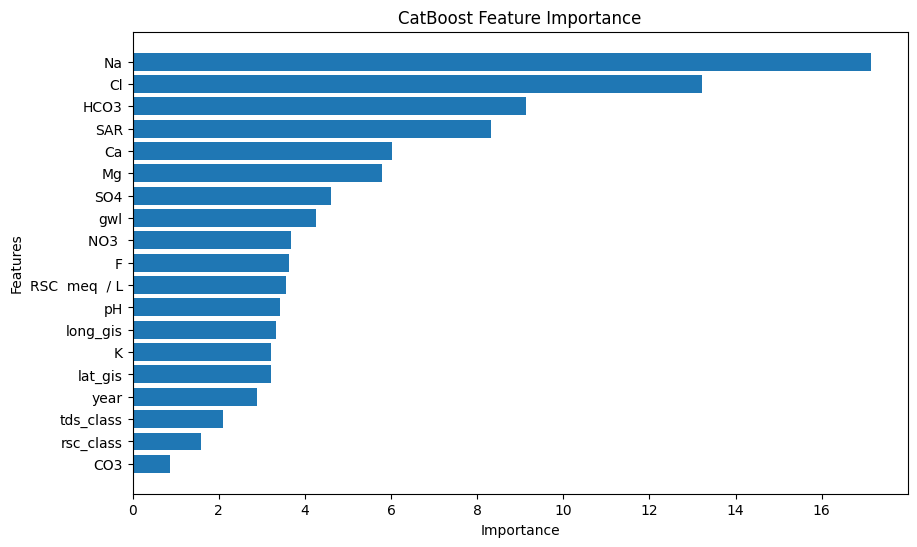

In [165]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Sparrow Search Algorithm

In [172]:
from mealpy import FloatVar, SSA

#### CatBoost

In [174]:
model_ssa_cb = SSA.OriginalSSA(epoch=20, pop_size=20, ST = 0.8, PD = 0.2, SD = 0.1)
g_best_ssa_cb = model_ssa_cb.solve(problem_dict_cb)


2023-11-09 17:15:04,394 - mealpy.swarm_based.SSA.OriginalSSA - INFO - Solving 2-objective optimization problem with weights: [0.7 0.3].


AUC: 0.9614963284622985
AUC: 0.922838437548133
AUC: 0.9729752604747056
AUC: 0.9692156538479851
AUC: 0.9684281529716398
AUC: 0.9720290579944603
AUC: 0.9687575256743418
AUC: 0.9733716636813953
AUC: 0.9699546373814493
AUC: 0.9694405847981732
AUC: 0.9636535803459233
AUC: 0.9734054438903974
AUC: 0.9690135942386026
AUC: 0.9760246136203765
AUC: 0.9599102912962371
AUC: 0.9732192083529402
AUC: 0.9680139208817474
AUC: 0.9680548523969571
AUC: 0.9676359940735918
AUC: 0.9680268289972216
AUC: 0.9683655198631338
AUC: 0.968044363346169
AUC: 0.9765573056408624
AUC: 0.9685461871175315
AUC: 0.9698970526279509
AUC: 0.9715146206418789
AUC: 0.9625769563230202
AUC: 0.9690993254468432
AUC: 0.9712418198641407
AUC: 0.9704019462004273
AUC: 0.9708988492040613
AUC: 0.9680492841138975
AUC: 0.9689425903242209
AUC: 0.9717851101162257
AUC: 0.9719046260657406
AUC: 0.9720339787621887
AUC: 0.9588466858036412
AUC: 0.9689198290800237
AUC: 0.9659418042074748
AUC: 0.9712255740040859
AUC: 0.9703724457855923
AUC: 0.96580688322

2023-11-09 17:30:30,552 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 1, Current best: 0.925327674046763, Global best: 0.925327674046763, Runtime: 569.33884 seconds


AUC: 0.970768848992282
AUC: 0.9729153189066246
AUC: 0.9721556081680922
AUC: 0.9675354942766474
AUC: 0.9705706473889372
AUC: 0.9731834193360883
AUC: 0.9714312603283047
AUC: 0.9698426357051821
AUC: 0.9715082228590509
AUC: 0.9684847248966036
AUC: 0.969966340701311
AUC: 0.9655854380345047
AUC: 0.9708862356228424
AUC: 0.9730449388813707
AUC: 0.9594919576562937
AUC: 0.9676654944884268
AUC: 0.9730329728154831
AUC: 0.9686024224432094
AUC: 0.9716044428618282
AUC: 0.9717851101162257
AUC: 0.974491383421006
AUC: 0.968416186905752
AUC: 0.9729272849725122
AUC: 0.968637491141104
AUC: 0.9745476187466839
AUC: 0.9708868831381735
AUC: 0.9688125901124417
AUC: 0.969327027465023
AUC: 0.9741475832611585
AUC: 0.970768848992282
AUC: 0.9720170919285726
AUC: 0.9753896103990581
AUC: 0.972406449837103
AUC: 0.9727814478463391
AUC: 0.9678686168595
AUC: 0.9686199567921566
AUC: 0.9735634675019121
AUC: 0.971206714147422


2023-11-09 17:38:58,238 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 2, Current best: 0.9255690922428321, Global best: 0.9255690922428321, Runtime: 507.68345 seconds


AUC: 0.9705691703738376
AUC: 0.9673597477899785
AUC: 0.9710555843266836
AUC: 0.9716557574197776
AUC: 0.9747255944606567
AUC: 0.9677896202896248
AUC: 0.971451987533373
AUC: 0.973914312959919
AUC: 0.9744548377080119
AUC: 0.9718252457814839
AUC: 0.9706978450779005
AUC: 0.9644157636699534
AUC: 0.9684337212546995
AUC: 0.9724543095683814
AUC: 0.9725788572680161
AUC: 0.9714688743669893
AUC: 0.9680492841138975
AUC: 0.9588925531571938
AUC: 0.9718364246741751
AUC: 0.9723251822325764
AUC: 0.9685581531834191
AUC: 0.9643721231345609
AUC: 0.9703988763993133
AUC: 0.9718188903252277
AUC: 0.9670509375759343
AUC: 0.9751858405126536
AUC: 0.9725280792430065
AUC: 0.9717113452301241
AUC: 0.9686263545749846
AUC: 0.9710675503925712
AUC: 0.967839116444665
AUC: 0.970284292291569
AUC: 0.9715131436267795
AUC: 0.9748751730464768
AUC: 0.9753601099842232
AUC: 0.9708960466812453
AUC: 0.9682179853024072
AUC: 0.9746650053772443


2023-11-09 17:46:04,690 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 3, Current best: 0.9255690922428321, Global best: 0.9255690922428321, Runtime: 426.44995 seconds


AUC: 0.9713339533874814
AUC: 0.9728028530437927
AUC: 0.9727708125959159
AUC: 0.9716565869195458
AUC: 0.9708785123322979
AUC: 0.9719833117195704
AUC: 0.9679827727128569
AUC: 0.9688350452291176
AUC: 0.9697927981623323
AUC: 0.971458385316201
AUC: 0.9752851305727964
AUC: 0.9710675503925712
AUC: 0.9695126154871488
AUC: 0.9697754232220474
AUC: 0.9631738273308482
AUC: 0.971497691481691
AUC: 0.9706595835238848
AUC: 0.9726596722408004
AUC: 0.9732424571845822
AUC: 0.9670558583436627
AUC: 0.9720826017797134
AUC: 0.9455487877686277
AUC: 0.9750494425180464
AUC: 0.9706687294323708
AUC: 0.972406449837103
AUC: 0.9753720760501108
AUC: 0.9730489143784159
AUC: 0.9682623881203635
AUC: 0.9748110629228716
AUC: 0.9734561109330157
AUC: 0.9726046514404478
AUC: 0.972671638306688
AUC: 0.9719777434365108
AUC: 0.9728417741837255
AUC: 0.9688181583955014
AUC: 0.9722321803655335
AUC: 0.972406449837103
AUC: 0.9714332011210525


2023-11-09 17:53:11,163 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 4, Current best: 0.9255690922428321, Global best: 0.9255690922428321, Runtime: 426.47249 seconds


AUC: 0.9712601837128564
AUC: 0.9706831132517691
AUC: 0.9705481922722613
AUC: 0.9685581531834191
AUC: 0.9705347491912742
AUC: 0.973208719302152
AUC: 0.973178529045414
AUC: 0.9750924972525113
AUC: 0.9709486867469113
AUC: 0.9716861985730237
AUC: 0.9717481536891442
AUC: 0.9697996180998484
AUC: 0.9719324061072819
AUC: 0.962998849973873
AUC: 0.9559980611956367
AUC: 0.970872339910113
AUC: 0.9727290833691674
AUC: 0.9723502145114251
AUC: 0.9606280045851063
AUC: 0.9682945574998484
AUC: 0.9686642260519469
AUC: 0.9723919437381735
AUC: 0.9755743689214157
AUC: 0.9746769714431319
AUC: 0.9700860906882242
AUC: 0.9730667530244851
AUC: 0.9739769460684248
AUC: 0.972920239674353
AUC: 0.9725308817658226
AUC: 0.9744963041887345
AUC: 0.9748807413295365
AUC: 0.972920239674353
AUC: 0.9691878637101721
AUC: 0.9709375501807918
AUC: 0.9678510825105526
AUC: 0.9670733926926101
AUC: 0.9612502835222627
AUC: 0.9759476694960983


2023-11-09 17:59:16,327 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 5, Current best: 0.9261695028790167, Global best: 0.9261695028790167, Runtime: 365.16020 seconds


AUC: 0.9716501891367179
AUC: 0.971153286133084
AUC: 0.9719749409136947
AUC: 0.9689306242583333
AUC: 0.9739382450916944
AUC: 0.9714921231986313
AUC: 0.9715499520857994
AUC: 0.9699412782499938
AUC: 0.9588638173397807
AUC: 0.9737962788140274
AUC: 0.9692480308951478
AUC: 0.9703547520279826
AUC: 0.9734396217147666
AUC: 0.9716997767796038
AUC: 0.971265751995916
AUC: 0.9615560377130734
AUC: 0.9714237756074308
AUC: 0.9741054692651047
AUC: 0.9689868595840112
AUC: 0.9670558583436627
AUC: 0.9717906783992855
AUC: 0.9757751397856542
AUC: 0.9715082228590509
AUC: 0.9718280538682994
AUC: 0.9677617562985517
AUC: 0.9737723466822521
AUC: 0.9690634317814525
AUC: 0.9725698500208512
AUC: 0.9758738998214732
AUC: 0.9713831386264764
AUC: 0.9657731942248087
AUC: 0.9753720760501108
AUC: 0.9757614339586412
AUC: 0.9716912655403872
AUC: 0.9677091162328857
AUC: 0.9741013779971444
AUC: 0.9736423464704728
AUC: 0.9729153189066246


2023-11-09 18:05:19,092 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 6, Current best: 0.9261695028790167, Global best: 0.9261695028790167, Runtime: 362.76294 seconds


AUC: 0.9739198812429787
AUC: 0.9713100212557061
AUC: 0.9742861365195021
AUC: 0.9684420920605751
AUC: 0.9727047710003589
AUC: 0.9712454151241526
AUC: 0.9706566039578209
AUC: 0.9709039161714248
AUC: 0.9702480138568728
AUC: 0.9604634296255488
AUC: 0.9698642242314021
AUC: 0.9730959861610221
AUC: 0.9729979041175884
AUC: 0.9699120839626804
AUC: 0.9705066887727148
AUC: 0.9717787123333977
AUC: 0.9656901173530062
AUC: 0.9694633818218829
AUC: 0.9702426717099318
AUC: 0.9691758976442845
AUC: 0.972909750623565
AUC: 0.9716799522975786
AUC: 0.9744618830061711
AUC: 0.9732192083529402
AUC: 0.9726046514404478
AUC: 0.970768848992282
AUC: 0.9718308563911154
AUC: 0.9742805682364425
AUC: 0.9720957823709262
AUC: 0.9711357517841366
AUC: 0.970281489768753
AUC: 0.9753720760501108
AUC: 0.9766667062348523
AUC: 0.971647386613902
AUC: 0.9702332948768032
AUC: 0.9752074661295612
AUC: 0.9694457683119276
AUC: 0.9721744680247562


2023-11-09 18:11:28,954 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 7, Current best: 0.9270284912847897, Global best: 0.9270284912847897, Runtime: 369.85943 seconds


AUC: 0.9695827899017622
AUC: 0.9713395216705413
AUC: 0.9679368182510655
AUC: 0.9682250306005664
AUC: 0.9716501891367179
AUC: 0.973347883057003
AUC: 0.9729395137844258
AUC: 0.967478952823448
AUC: 0.9707126136666041
AUC: 0.9738873394794058
AUC: 0.9717795418331661
AUC: 0.9707519621586659
AUC: 0.938229590373919
AUC: 0.961766167717475
AUC: 0.9668919172030436
AUC: 0.9716326547877706
AUC: 0.9690820583761939
AUC: 0.962614412833071
AUC: 0.973529875819117
AUC: 0.9629537228777912
AUC: 0.9684281529716398
AUC: 0.9709375501807918
AUC: 0.9716782125364535
AUC: 0.9691878637101721
AUC: 0.9727290833691674
AUC: 0.9725603821806575
AUC: 0.9692584828552482
AUC: 0.9741631816058819
AUC: 0.9709944330218009
AUC: 0.9745082702546223
AUC: 0.9730667530244851
AUC: 0.9705762156719969
AUC: 0.9683683271744737
AUC: 0.975061408583934
AUC: 0.9766667062348523
AUC: 0.9712593542130881
AUC: 0.9689657299750519
AUC: 0.9743212052173967


2023-11-09 18:20:07,600 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 8, Current best: 0.9270284912847897, Global best: 0.9270284912847897, Runtime: 518.64426 seconds


AUC: 0.9717970761821132
AUC: 0.9682355196513547
AUC: 0.9701126714981525
AUC: 0.9683774859290216
AUC: 0.9716487121216185
AUC: 0.9702615315665958
AUC: 0.9677405207003176
AUC: 0.9730065058481067
AUC: 0.9610292987449528
AUC: 0.9658953409032597
AUC: 0.9729703397069772
AUC: 0.972648535674681
AUC: 0.9679966374293082
AUC: 0.9682474857172423
AUC: 0.9700111112767974
AUC: 0.972094567845601
AUC: 0.9609482204904429
AUC: 0.9720106941457446
AUC: 0.9737280774224617
AUC: 0.971073948175399
AUC: 0.9702723262256813
AUC: 0.9700804790236687
AUC: 0.9686143885090969
AUC: 0.9746600846095159
AUC: 0.9722152935319174
AUC: 0.9745476187466839
AUC: 0.9683120918487959
AUC: 0.9716311777726712
AUC: 0.9729634406084532
AUC: 0.9695329523589122
AUC: 0.9731503594460434
AUC: 0.9686263545749846
AUC: 0.9741512155399943
AUC: 0.9753896103990581
AUC: 0.9714273708674427
AUC: 0.9748863096125961
AUC: 0.9723649463375564
AUC: 0.9743036708684495


2023-11-09 18:28:33,871 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 9, Current best: 0.9270284912847897, Global best: 0.9270284912847897, Runtime: 506.26905 seconds


AUC: 0.9700617783194155
AUC: 0.9732985463106251
AUC: 0.971497691481691
AUC: 0.9716501891367179
AUC: 0.973078409485503
AUC: 0.9733492085647195
AUC: 0.9684217551888118
AUC: 0.971206714147422
AUC: 0.9685529262881691
AUC: 0.9753856303697407
AUC: 0.9730329728154831
AUC: 0.9716861985730237
AUC: 0.9685904563773217
AUC: 0.9013881486676486
AUC: 0.9710886800015305
AUC: 0.9585979430248649
AUC: 0.9680492841138975
AUC: 0.9717081523740033
AUC: 0.9746825397261917
AUC: 0.9725941623896598
AUC: 0.967164482523867
AUC: 0.9714237756074308
AUC: 0.9703429030441856
AUC: 0.9750733746498216
AUC: 0.9731135205099695
AUC: 0.9676704152561552
AUC: 0.9732824889767774
AUC: 0.9743423718451799
AUC: 0.9710970508074062
AUC: 0.9722202142996458
AUC: 0.9717064244623957
AUC: 0.971265751995916
AUC: 0.9744858151379464
AUC: 0.9690016281727148
AUC: 0.9716536328893469
AUC: 0.9736392764131071
AUC: 0.9750669768669936
AUC: 0.9718829581222613


2023-11-09 18:35:09,341 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 10, Current best: 0.9270284912847897, Global best: 0.9270284912847897, Runtime: 395.46816 seconds


AUC: 0.9703675250178638
AUC: 0.9716846103192814
AUC: 0.9705706473889372
AUC: 0.9660601968375082
AUC: 0.9678510825105526
AUC: 0.9727652443128562
AUC: 0.9729465895596389
AUC: 0.9678566507936123
AUC: 0.9713219873215938
AUC: 0.9707799855584014
AUC: 0.9721977168563982
AUC: 0.9739705482855969
AUC: 0.9723677488603725
AUC: 0.9698921318602225
AUC: 0.9708988492040613
AUC: 0.9701598603628493
AUC: 0.9718069242593401
AUC: 0.9681723773742071
AUC: 0.9687324226549886
AUC: 0.972022012696301
AUC: 0.9703850593668112
AUC: 0.9672890115628117
AUC: 0.9644747949283433
AUC: 0.9743494171433391
AUC: 0.9720515131111359
AUC: 0.9717675757672782
AUC: 0.9747268089859821
AUC: 0.9744794173551184
AUC: 0.9738967786109717
AUC: 0.9757565131909128
AUC: 0.971438695959769
AUC: 0.9715257572079983
AUC: 0.974371872260015
AUC: 0.973941047870762
AUC: 0.9683663493629021
AUC: 0.9698998551507669
AUC: 0.9753960081818861
AUC: 0.9722174117768297


2023-11-09 18:44:17,191 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 11, Current best: 0.9270284912847897, Global best: 0.9270284912847897, Runtime: 547.84738 seconds


AUC: 0.9608908110541243
AUC: 0.9712777180618036
AUC: 0.9716431438385588
AUC: 0.9724495045715681
AUC: 0.9735108644550702
AUC: 0.9713044529726464
AUC: 0.9710667434685775
AUC: 0.9733998756073378
AUC: 0.9677217298141046
AUC: 0.9709030866716567
AUC: 0.9695131459203896
AUC: 0.9730090406837077
AUC: 0.9637424970930392
AUC: 0.9754736257662774
AUC: 0.9673665258098395
AUC: 0.9265032971741279
AUC: 0.9706204849317871
AUC: 0.9596901592596385
AUC: 0.9736985770076269
AUC: 0.9705017984820404
AUC: 0.9747595143275238
AUC: 0.9717008561793361
AUC: 0.9741296641429057
AUC: 0.9679248521851779
AUC: 0.9745525395144123
AUC: 0.9695723008509741
AUC: 0.9597120896928922
AUC: 0.9745356526807963
AUC: 0.9745476187466839
AUC: 0.9688707984611673
AUC: 0.9753840421159984
AUC: 0.9742876135346016
AUC: 0.9732634776127305
AUC: 0.9737336457055216
AUC: 0.9710675503925712
AUC: 0.9748632069805891
AUC: 0.975173874446766
AUC: 0.9716551099044465


2023-11-09 18:50:30,096 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 12, Current best: 0.9270284912847897, Global best: 0.9270284912847897, Runtime: 372.90284 seconds


AUC: 0.97377874446508
AUC: 0.9686101457337536
AUC: 0.9718469137249631
AUC: 0.9738861010339765
AUC: 0.9716557574197776
AUC: 0.9704849116484243
AUC: 0.9748632069805891
AUC: 0.9715561983612444
AUC: 0.971153286133084
AUC: 0.9687379909380484
AUC: 0.9737400434883495
AUC: 0.9703379822764572
AUC: 0.9623469827509648
AUC: 0.9674841797186979
AUC: 0.9731145704291917
AUC: 0.9683774859290216
AUC: 0.9682355196513547
AUC: 0.9702614153867638
AUC: 0.973566714755191
AUC: 0.9595103215050093
AUC: 0.9742925343023301
AUC: 0.97076312130056
AUC: 0.9692064903049135
AUC: 0.9729272849725122
AUC: 0.9723677488603725
AUC: 0.9716382230708303
AUC: 0.975044521750318
AUC: 0.9722082482337582
AUC: 0.9745033494868937
AUC: 0.9746881080092513
AUC: 0.9716446208536582
AUC: 0.9702655482058201
AUC: 0.9766547401689648
AUC: 0.9734736452819629
AUC: 0.9735756220940067
AUC: 0.9719749409136947
AUC: 0.9751858405126536
AUC: 0.9729029726037037


2023-11-09 18:58:31,686 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 13, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 481.58834 seconds


AUC: 0.9750733746498216
AUC: 0.9712994898783461
AUC: 0.9728339417123699
AUC: 0.9714392145434919
AUC: 0.9705586813230496
AUC: 0.9714639535992607
AUC: 0.972022354603335
AUC: 0.9672721247291957
AUC: 0.9678686168595
AUC: 0.969043228467855
AUC: 0.9703547520279826
AUC: 0.9732192083529402
AUC: 0.9677281275969326
AUC: 0.9720339787621887
AUC: 0.9696474928289093
AUC: 0.9721520129080803
AUC: 0.9705881817378845
AUC: 0.9668913457434761
AUC: 0.969811316887438
AUC: 0.9695034519440773
AUC: 0.9715082228590509
AUC: 0.9719713456536828
AUC: 0.9728172368631909
AUC: 0.9752651784703387
AUC: 0.9722321803655335
AUC: 0.9675404150443758
AUC: 0.9698878890848793
AUC: 0.9707744172753415
AUC: 0.9704357264094293
AUC: 0.9729915063347604
AUC: 0.9713444424382697
AUC: 0.9718483907400627
AUC: 0.9718357771588438
AUC: 0.9703955484175993
AUC: 0.9731015544440819
AUC: 0.9720395470452483
AUC: 0.9681055194395753
AUC: 0.9734616792160753


2023-11-09 19:05:30,922 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 14, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 419.23342 seconds


AUC: 0.9717408456449593
AUC: 0.9720395470452483
AUC: 0.9718533115077911
AUC: 0.9709016149643049
AUC: 0.9684217551888118
AUC: 0.9698186241561474
AUC: 0.9714397158591881
AUC: 0.9711325589280158
AUC: 0.9718788318933088
AUC: 0.9716606781875061
AUC: 0.9720395470452483
AUC: 0.9657538193560556
AUC: 0.9694957286535328
AUC: 0.9711413200671964
AUC: 0.9691808184120129
AUC: 0.9710724711602996
AUC: 0.9715975490710521
AUC: 0.9682559903375355
AUC: 0.9684217551888118
AUC: 0.9737978300489457
AUC: 0.9705129350481597
AUC: 0.973914312959919
AUC: 0.9699736248253922
AUC: 0.9742812157517736
AUC: 0.9746032017685068
AUC: 0.9700258801217526
AUC: 0.9743092391515091
AUC: 0.9737034977753553
AUC: 0.9741807159548294
AUC: 0.971627044178139
AUC: 0.9707435913527901
AUC: 0.9737336457055216
AUC: 0.9717239588113432
AUC: 0.9697016535474221
AUC: 0.9743663039769553
AUC: 0.9694853553736597
AUC: 0.9718828119226263
AUC: 0.9735028784184999


2023-11-09 19:12:52,829 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 15, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 441.90527 seconds


AUC: 0.9743774405430746
AUC: 0.9702922783281392
AUC: 0.966258398440853
AUC: 0.9705762156719969
AUC: 0.9728354187274695
AUC: 0.9696149336870025
AUC: 0.9707303736324461
AUC: 0.9690823884337099
AUC: 0.9728270479215938
AUC: 0.9459886307353395
AUC: 0.9587879580957169
AUC: 0.9735916794278546
AUC: 0.971451987533373
AUC: 0.9633445578014211
AUC: 0.9715302506235979
AUC: 0.9733423094661955
AUC: 0.973920710742747
AUC: 0.9703253740029861
AUC: 0.9710009054333647
AUC: 0.9730195297344958
AUC: 0.9659354064246468
AUC: 0.9720826017797134
AUC: 0.9752209092105483
AUC: 0.9691758976442845
AUC: 0.9716501891367179
AUC: 0.9716606781875061
AUC: 0.9708693487892264
AUC: 0.971451987533373
AUC: 0.9715321549908262
AUC: 0.9757565131909128
AUC: 0.9722377486485931
AUC: 0.9713001731784794
AUC: 0.9748927073954241
AUC: 0.9712713202789757
AUC: 0.9712629494731
AUC: 0.9689868595840112
AUC: 0.9758738998214732
AUC: 0.9751858405126536


2023-11-09 19:19:57,808 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 16, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 424.97721 seconds


AUC: 0.973411012173457
AUC: 0.9673477817240906
AUC: 0.9725484161147699
AUC: 0.970874917072286
AUC: 0.9667721882781031
AUC: 0.9732247766359999
AUC: 0.9711357517841366
AUC: 0.9714178336291077
AUC: 0.9703709687704928
AUC: 0.9636204827910476
AUC: 0.9705586813230496
AUC: 0.9737280774224617
AUC: 0.9703169976331109
AUC: 0.9688515482711986
AUC: 0.9680387950631092
AUC: 0.966705110206019
AUC: 0.9739367680765948
AUC: 0.9691298209972472
AUC: 0.9732247766359999
AUC: 0.9705706473889372
AUC: 0.966145665299723
AUC: 0.9720596506550893
AUC: 0.9716326547877706
AUC: 0.973281841461446
AUC: 0.974371872260015
AUC: 0.9739699007702657
AUC: 0.9741512155399943
AUC: 0.9713275556046536
AUC: 0.9755702776534556
AUC: 0.9759596355619861
AUC: 0.9718413454419035
AUC: 0.972903352840737
AUC: 0.9724887307509449
AUC: 0.9735682724987256
AUC: 0.9718828119226263
AUC: 0.9748807413295365
AUC: 0.9714569083011017
AUC: 0.9699736248253922


2023-11-09 19:27:11,140 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 17, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 433.33048 seconds


AUC: 0.9748751730464768
AUC: 0.9694917531564876
AUC: 0.9712601837128564
AUC: 0.9723621805773127
AUC: 0.9733436402816599
AUC: 0.9700448914857995
AUC: 0.9676879496051024
AUC: 0.9711253369531674
AUC: 0.9714464192503134
AUC: 0.9689545563901087
AUC: 0.9705404266551451
AUC: 0.9732192083529402
AUC: 0.9715082228590509
AUC: 0.9685581531834191
AUC: 0.9714006729754238
AUC: 0.9613199269679354
AUC: 0.974335589036795
AUC: 0.972264098533879
AUC: 0.9757231419275715
AUC: 0.9737562470218325
AUC: 0.9711357517841366
AUC: 0.9683774859290216
AUC: 0.9755702776534556
AUC: 0.9751978065785413
AUC: 0.9746769714431319
AUC: 0.9720395470452483
AUC: 0.9746840167412912
AUC: 0.9745525395144123
AUC: 0.9707070453835445
AUC: 0.9744225345141094
AUC: 0.9705881817378845
AUC: 0.9710555843266836
AUC: 0.9716861985730237
AUC: 0.9740894119312568
AUC: 0.9714633060839296
AUC: 0.9747507411177572
AUC: 0.971969372630635
AUC: 0.9757346990477983


2023-11-09 19:35:40,313 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 18, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 509.17052 seconds


AUC: 0.9725280792430065
AUC: 0.9718539590231224
AUC: 0.9714639535992607
AUC: 0.9737432438827843
AUC: 0.9731496814536582
AUC: 0.9737667783991925
AUC: 0.9689355013883145
AUC: 0.9687460787114012
AUC: 0.9709053582255321
AUC: 0.9723530346688266
AUC: 0.9730210067495954
AUC: 0.9681865425992614
AUC: 0.9712587066977568
AUC: 0.9647810961247855
AUC: 0.9673597477899785
AUC: 0.9723034470259408
AUC: 0.9414324450826378
AUC: 0.9707144333806887
AUC: 0.9727770588713608
AUC: 0.971288854627923
AUC: 0.962965688943679
AUC: 0.9671510571358454
AUC: 0.9700980567541118
AUC: 0.9737907105309677
AUC: 0.9694647557558705
AUC: 0.9729153189066246
AUC: 0.9746840167412912
AUC: 0.9733928303091784
AUC: 0.9657642432482456
AUC: 0.9738405480738176
AUC: 0.9709550845297392
AUC: 0.9732136400698805
AUC: 0.9748751730464768
AUC: 0.9746825397261917
AUC: 0.9726046514404478
AUC: 0.9745525395144123
AUC: 0.971411809541543
AUC: 0.9705586813230496


2023-11-09 19:42:43,785 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 19, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 423.47027 seconds


AUC: 0.9723621805773127
AUC: 0.9698691449991305
AUC: 0.9685756875323664
AUC: 0.9761904028490077
AUC: 0.9738855997182805
AUC: 0.9686770526085913
AUC: 0.9716206887218829
AUC: 0.9591075205154919
AUC: 0.9723566122942531
AUC: 0.9745273928573118
AUC: 0.9410830766397306
AUC: 0.9735580454184877
AUC: 0.970845819061342
AUC: 0.9679073178362305
AUC: 0.9711076860578293
AUC: 0.9686024224432094
AUC: 0.9691112915127308
AUC: 0.9667576873766143
AUC: 0.9764526677171138
AUC: 0.9737210321243026
AUC: 0.9573495742213876
AUC: 0.9716446208536582
AUC: 0.9713339533874814
AUC: 0.9709550845297392
AUC: 0.9746705736603042
AUC: 0.9731240095607575
AUC: 0.9750227076072034
AUC: 0.9714695218823204
AUC: 0.9713795111361643
AUC: 0.9718477432247314
AUC: 0.9739769460684248
AUC: 0.9743494171433391
AUC: 0.9751978065785413
AUC: 0.9731015544440819
AUC: 0.9725308817658226
AUC: 0.9740117474880213
AUC: 0.9702723262256813
AUC: 0.9720410240603479


2023-11-09 19:49:19,052 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 20, Current best: 0.9272689372765472, Global best: 0.9272689372765472, Runtime: 395.26520 seconds


AUC: 0.9744907359056748


In [175]:
print(f"Solution: {g_best_ssa_cb.solution}, Fitness: {g_best_ssa_cb.target.fitness}")

Solution: [1.65798611e+03 4.86504012e+00 7.93158570e-02 3.33805085e+01
 6.75798073e-01], Fitness: 0.9272689372765472


In [177]:
# Now, best_hyperparameter_values is an array of hyperparameter values
# You can print it to see the best hyperparameters
# print("Best accuracy:", -best_accuracy)
print("Best hyperparameters:", g_best_ssa_cb.target.fitness)
print("iteration:", int(g_best_ssa_cb.solution[0]))
print("depth:", int(g_best_ssa_cb.solution[1]))
print("learning_rate:", float(g_best_ssa_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_ssa_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_ssa_cb.solution[4]))


Best hyperparameters: 0.9272689372765472
iteration: 1657
depth: 4
learning_rate: 0.07931585702784189
min_data_in_leaf: 33
l2_leaf_reg: 0.6757980733743492


In [178]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_ssa_cb = {
    'iterations': int(g_best_ssa_cb.solution[0]),
    'depth': int(g_best_ssa_cb.solution[1]),
    'learning_rate': float(g_best_ssa_cb.solution[2]),
    'min_data_in_leaf': int(g_best_ssa_cb.solution[3]),
    "l2_leaf_reg": float(g_best_ssa_cb.solution[4]),
    'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [179]:
# Create a CatBoost classifier with the best hyperparameters
ssa_cb_model = CatBoostClassifier(**best_hyperparameters_ssa_cb)

# Train the model on your training data
ssa_cb_model.fit(train_pool , verbose = 1000 )

0:	learn: 1.5357753	total: 5.99ms	remaining: 9.93s
1000:	learn: 0.0062413	total: 4.64s	remaining: 3.04s
1656:	learn: 0.0025864	total: 7.67s	remaining: 0us


In [180]:
importances = ssa_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

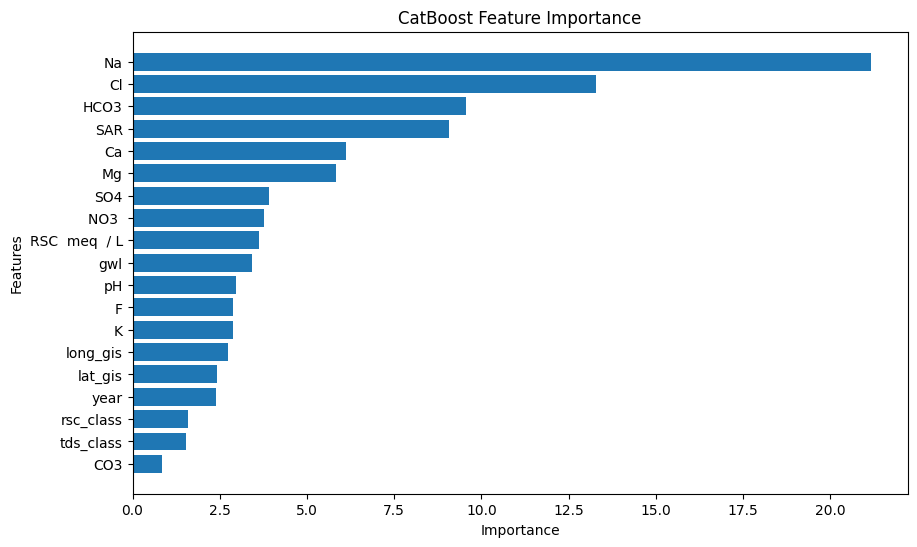

In [181]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# <span style="color:#e74c3c;"> Results </span>


In [182]:
from sklearn.metrics import roc_curve, auc

### Cat Boost Base Model

In [183]:
# predictions and scores

pred = cb_model.predict(test_pool)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.80534
Mean Squared Error :0.12771


In [184]:
# classification report

clf_report_cb = classification_report(pred, y_test)

print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       264
           1       0.96      0.98      0.97       749
           2       0.94      0.90      0.92       124
           3       0.88      0.81      0.85        37
           4       1.00      0.56      0.71         9
           5       1.00      0.93      0.97        15

    accuracy                           0.96      1198
   macro avg       0.96      0.86      0.90      1198
weighted avg       0.96      0.96      0.96      1198



### Base With SI

#### Catboost

#### PSO

In [185]:
# predictions and scores

pred = pso_cb_model.predict(test_pool)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.83460
Mean Squared Error :0.10851


In [186]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       261
           1       0.97      0.98      0.98       760
           2       0.94      0.93      0.93       120
           3       0.88      0.91      0.90        33
           4       1.00      0.56      0.71         9
           5       1.00      0.93      0.97        15

    accuracy                           0.97      1198
   macro avg       0.96      0.88      0.91      1198
weighted avg       0.97      0.97      0.97      1198



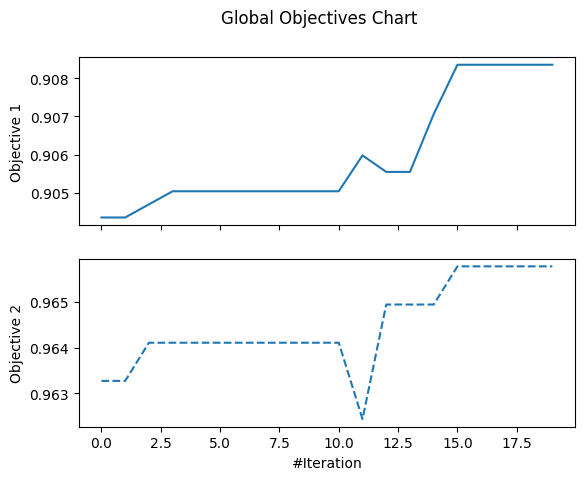

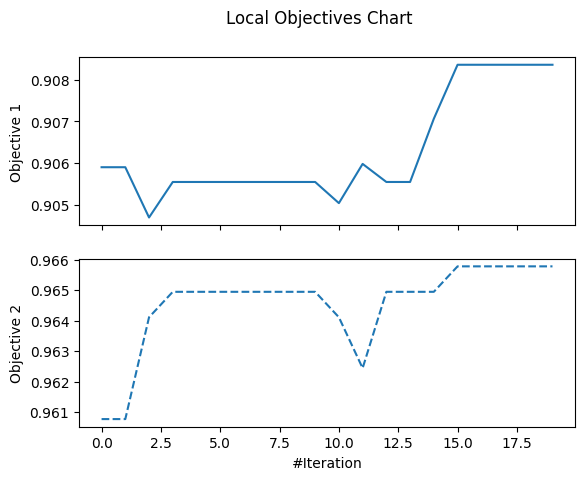

In [188]:
model_pso_cb.history.save_global_objectives_chart(filename="pso/goc")
model_pso_cb.history.save_local_objectives_chart(filename="pso/loc")

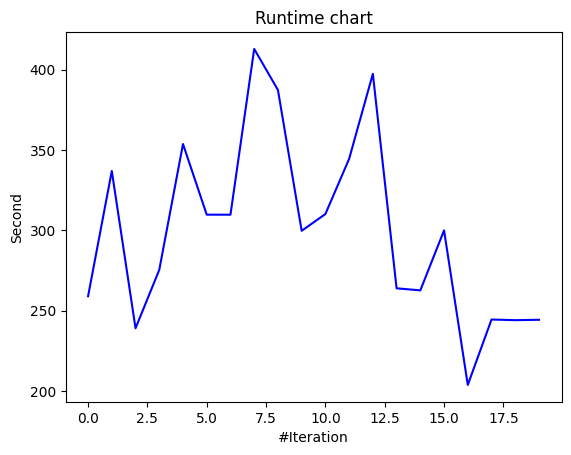

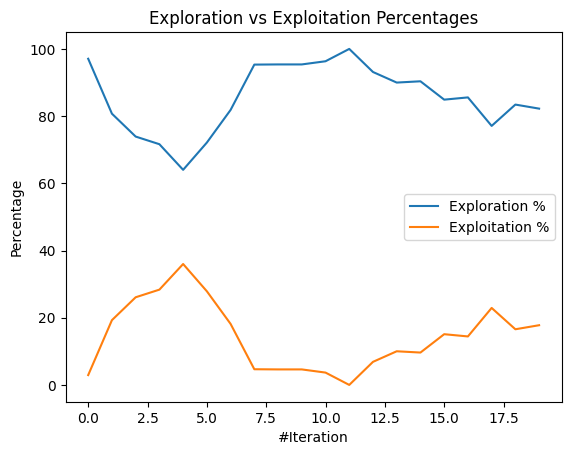

In [189]:
model_pso_cb.history.save_runtime_chart(filename="pso/rtc")
model_pso_cb.history.save_exploration_exploitation_chart(filename="pso/eec")

#### SSA

In [ ]:
# predictions and scores

pred = ssa_cb_model.predict(test_pool)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.87531
Mean Squared Error :0.08180


In [ ]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       264
           1       0.97      0.98      0.98       759
           2       0.93      0.94      0.94       117
           3       0.91      0.86      0.89        36
           4       1.00      0.71      0.83         7
           5       1.00      0.93      0.97        15

    accuracy                           0.97      1198
   macro avg       0.96      0.90      0.93      1198
weighted avg       0.97      0.97      0.97      1198



In [ ]:
model_ssa_cb.history.save_global_objectives_chart(filename="ssa/goc")
model_ssa_cb.history.save_local_objectives_chart(filename="ssa/loc")

In [ ]:
model_ssa_cb.history.save_runtime_chart(filename="ssa/rtc")
model_ssa_cb.history.save_exploration_exploitation_chart(filename="ssa/eec")

## Save Model

### Base Model

In [ ]:
cb_model.save_model('model_catboost.cbm',format="cbm")

### Base with SI

In [ ]:
pso_cb_model.save_model(f'model_pso_catboost_iter.cbm', format="cbm")